# Basic Counter Program
### Last edited: Thu 3/20 2:38PM

## Description: Counts the frequency of composers and works, generating bar graphs of the top 10.

In [13]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from common import *

%matplotlib inline

In [24]:
# Unpickle dataframes
concerts = pd.read_pickle(DF_FILE_LOC + "concerts.pkl")
works = pd.read_pickle(DF_FILE_LOC + "works.pkl")

In [46]:
# Clean works df
works = works.query('id != "0*"') # remove all entries that are intermissions

# Normalize title if it is a dictionary
def normalize_title(title):
    if isinstance(title, dict):
        return title.get("em", "") + " " + title.get("_", "")
    else:
        return title

works['n_title'] = works['title'].apply(normalize_title)

In [50]:
# Count frequency of composers
composer_freq = works["composer"].value_counts()
print("In total:\n" + str(composer_freq))
print("----------------------------\n")

unique_composer_freq = works.groupby('composer')['programID'].nunique().reset_index()
unique_composer_freq.columns = ['composer', 'frequency']
unique_composer_freq = unique_composer_freq.sort_values(by = 'frequency', ascending=False)
print("Unique concerts:\n" + str(unique_composer_freq))
print("----------------------------\n")

# Count frequency of works
work_freq = works["title"].value_counts()
print("Work frequency:\n" + str(work_freq))
print("----------------------------\n")

unique_work_freq = works.groupby('n_title')['programID'].nunique().reset_index()
unique_work_freq.columns = ['title', 'frequency']
unique_work_freq = unique_work_freq.sort_values(by = 'frequency', ascending=False)
print("Unique works:\n" + str(unique_work_freq))


In total:
composer
Wagner,  Richard               4995
Beethoven,  Ludwig  van        4684
Tchaikovsky,  Pyotr  Ilyich    3811
Mozart,  Wolfgang  Amadeus     2800
Brahms,  Johannes              2646
                               ... 
Amirov,  Fikret                   1
Seter,                            1
Fry,  William  Henry              1
Fenton,                           1
Alom,  Ahmed                      1
Name: count, Length: 3131, dtype: int64
----------------------------

Unique concerts:
                         composer  frequency
199       Beethoven,  Ludwig  van       3549
2770  Tchaikovsky,  Pyotr  Ilyich       2601
2921             Wagner,  Richard       2333
1947   Mozart,  Wolfgang  Amadeus       2219
339             Brahms,  Johannes       2141
...                           ...        ...
1370          Johnson,  James  P.          1
1367              Johns,  Clayton          1
1366     Johansen,  David  Monrad          1
1362               Jimenez,  Noah          1
313

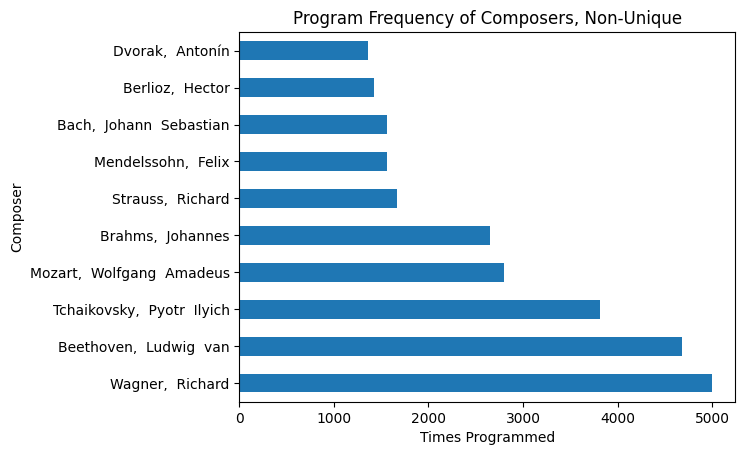

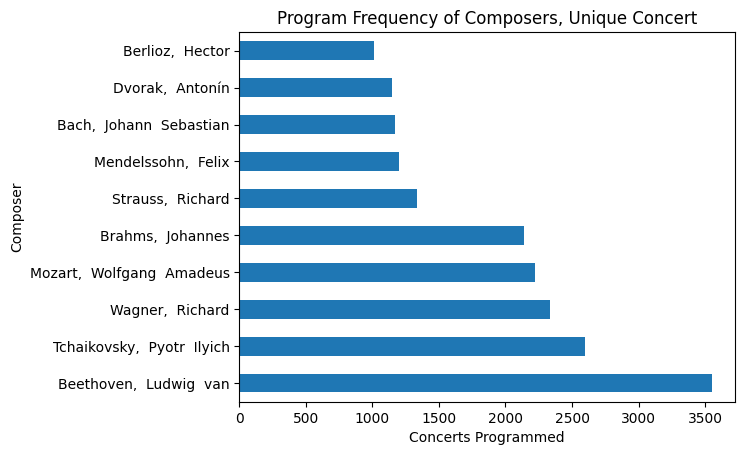

In [41]:
# Create bar graphs for composer frequency
top_10_composers = composer_freq.head(10)
top_10_composers.plot(kind='barh', xlabel='Times Programmed', ylabel='Composer', title='Program Frequency of Composers, Non-Unique')

top_10_unique_composers = unique_composer_freq.head(10)
top_10_unique_composers.plot(kind='barh', x='composer', y='frequency', xlabel='Concerts Programmed', ylabel='Composer', legend=False, title='Program Frequency of Composers, Unique Concert')
plt.show()
#plt.figure(figsize=(10,6))
#plt.bar(composer_freq.head(10)['composer'], composer_freq.head(10))

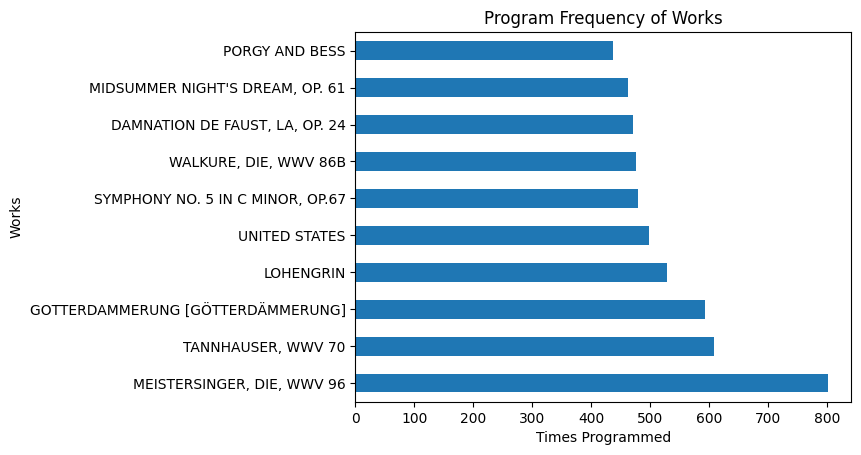

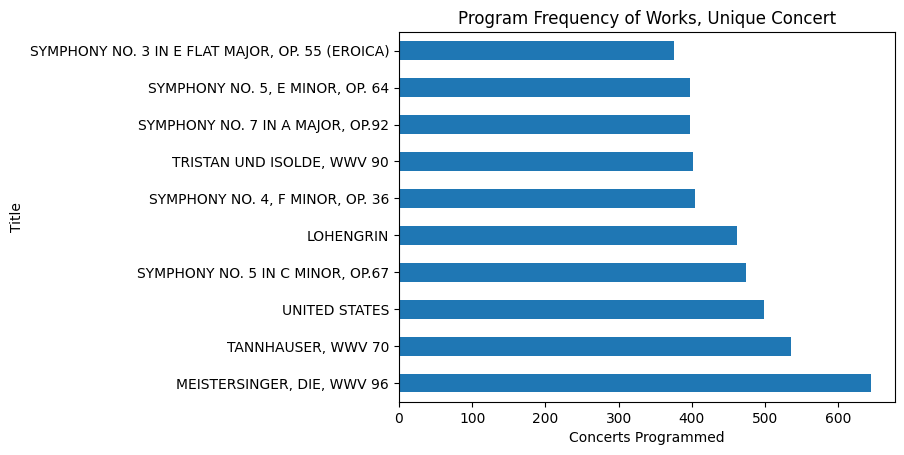

In [51]:
top_10_works = work_freq.head(10)
top_10_works.plot(kind='barh', xlabel='Times Programmed', ylabel='Works', title='Program Frequency of Works')

top_10_unique_works = unique_work_freq.head(10)
top_10_unique_works.plot(kind='barh', x='title', y='frequency', xlabel='Concerts Programmed', ylabel='Title', legend=False, title='Program Frequency of Works, Unique Concert')
plt.show()

In [5]:
# Print overall statistics
print("Total # of concerts: " + str(len(concerts)))
print("Total # of works: " + str(len(works)))
print("Avg # of works per concert: " + str((len(works) / len(concerts))))

Total # of concerts: 14805
Total # of works: 75666
Avg # of works per concert: 5.110840932117528
